In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Customer Churn (1).csv')

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing the blanks with 0 and changing the data type of TotalCharges

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df["customerID"].duplicated().sum()

np.int64(0)

coverted 0 and 1 values of senior citizen to no/yes

In [14]:
def conv(value) :
   if value == 1:
       return "yes"
   else:
       return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

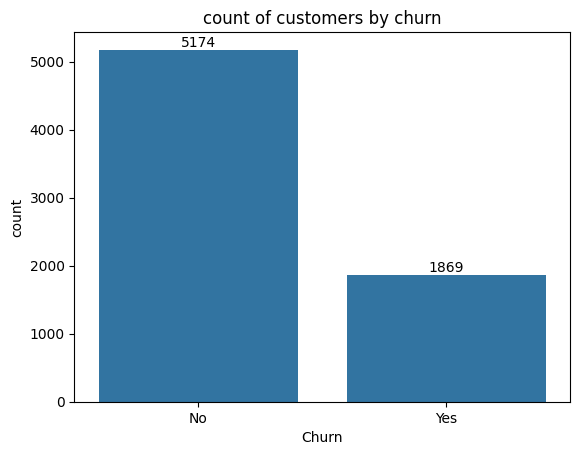

In [15]:
ax = sns.countplot(x ='Churn', data=df)

ax.bar_label(ax.containers[0])
plt.title('count of customers by churn')
plt.show()

the majority of customers were retained (5,174). However, the company still experienced significant churn with 1,869 customers leaving.

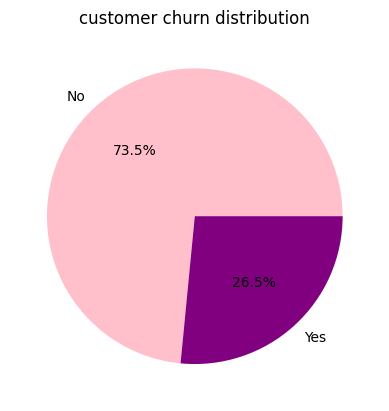

In [16]:
gb = df.groupby('Churn').size().reset_index(name='count')
colors = ['pink.purple']
plt.pie(gb['count'], labels = gb['Churn'], autopct = '%1.1f%%', colors = ['pink','purple'])
plt.title('customer churn distribution')
plt.show()

from given pie chart we can conclude that 26.5% customers has churned out

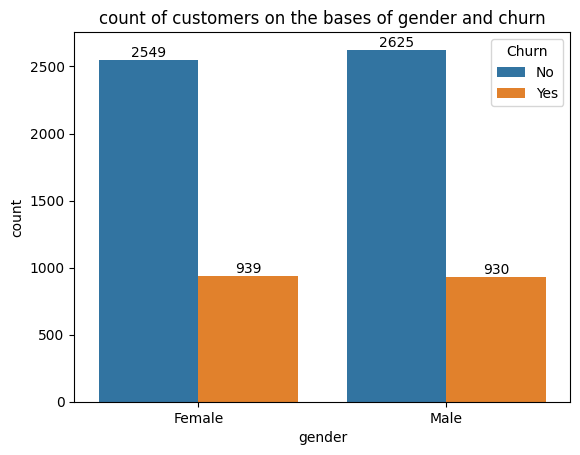

In [17]:

ax = sns.countplot(x = "gender", data = df, hue = 'Churn')
for container in ax.containers:ax.bar_label(container)
plt.title('count of customers on the bases of gender and churn')
plt.show()

his chart shows that gender has virtually no impact on customer churn. Both female and male customer groups have nearly the same total count (around 2,550 to 2,625) and almost identical absolute churn counts (939 for female, 930 for male). Therefore, churn rates are equal between genders, making gender an unhelpful predictor for customer attrition.

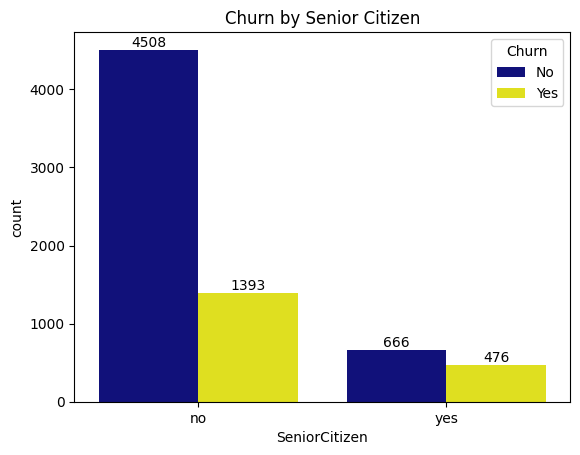

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# The correct argument is 'palette', and the keys must match the values in df['Churn']
ax = sns.countplot(
    x='SeniorCitizen', 
    data=df, 
    hue="Churn", 
    palette={'Yes':'yellow', 'No':'darkblue'} # I changed 'dark yellow' to 'dark blue' for better contrast
)

# Add the bar labels
for container in ax.containers:
    ax.bar_label(container)

# Set the title and show the plot
plt.title("Churn by Senior Citizen")
plt.show()

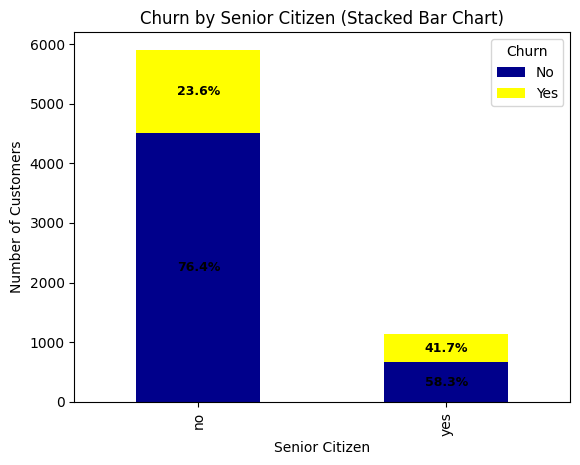

In [19]:
# Create a crosstab of SeniorCitizen vs Churn
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Calculate row-wise percentage
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot as a stacked bar chart
ct.plot(kind='bar', stacked=True, color=['darkblue', 'yellow'])

for i, (index, row) in enumerate(ct_percent.iterrows()):
    bottom = 0
    for churn_status, percent in row.items():
        height = ct.loc[index, churn_status]
        plt.text(i, bottom + height/2, f"{percent:.1f}%", ha='center', va='center', color='BLACK', fontsize=9, fontweight='bold')
        bottom += height

# Add labels and title
plt.title("Churn by Senior Citizen (Stacked Bar Chart)")
plt.xlabel("Senior Citizen")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()


Senior Citizens have a high churn rate; nearly half of the senior citizens

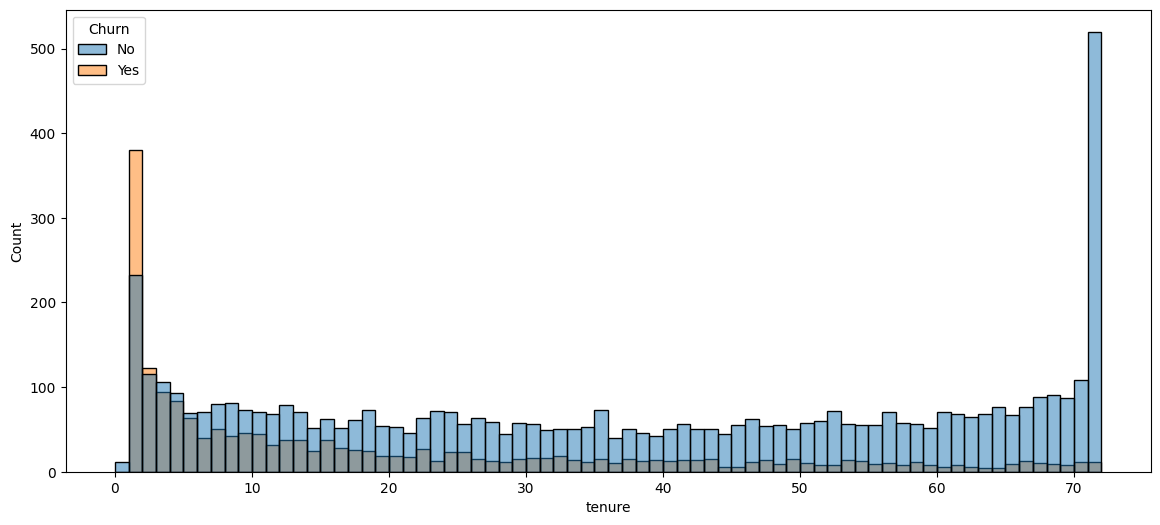

In [18]:
plt.figure(figsize = (14,6))
sns.histplot(x = "tenure", data=df , bins = 72, hue="Churn")
plt.show()

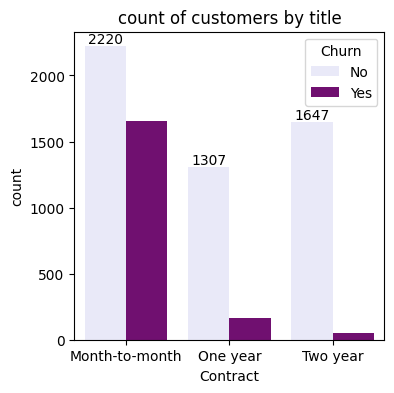

In [19]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, palette = {'Yes':'purple', 'No':'lavender'},hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customers by title")
plt.show()

Customers on a Month-to-month contract have the highest churn count by far (1647 churned vs. 2220 retained), indicating a very high churn rate. Conversely, customers with One year and especially Two year contracts show significantly lower churn counts and a much higher retention rate.

In [20]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

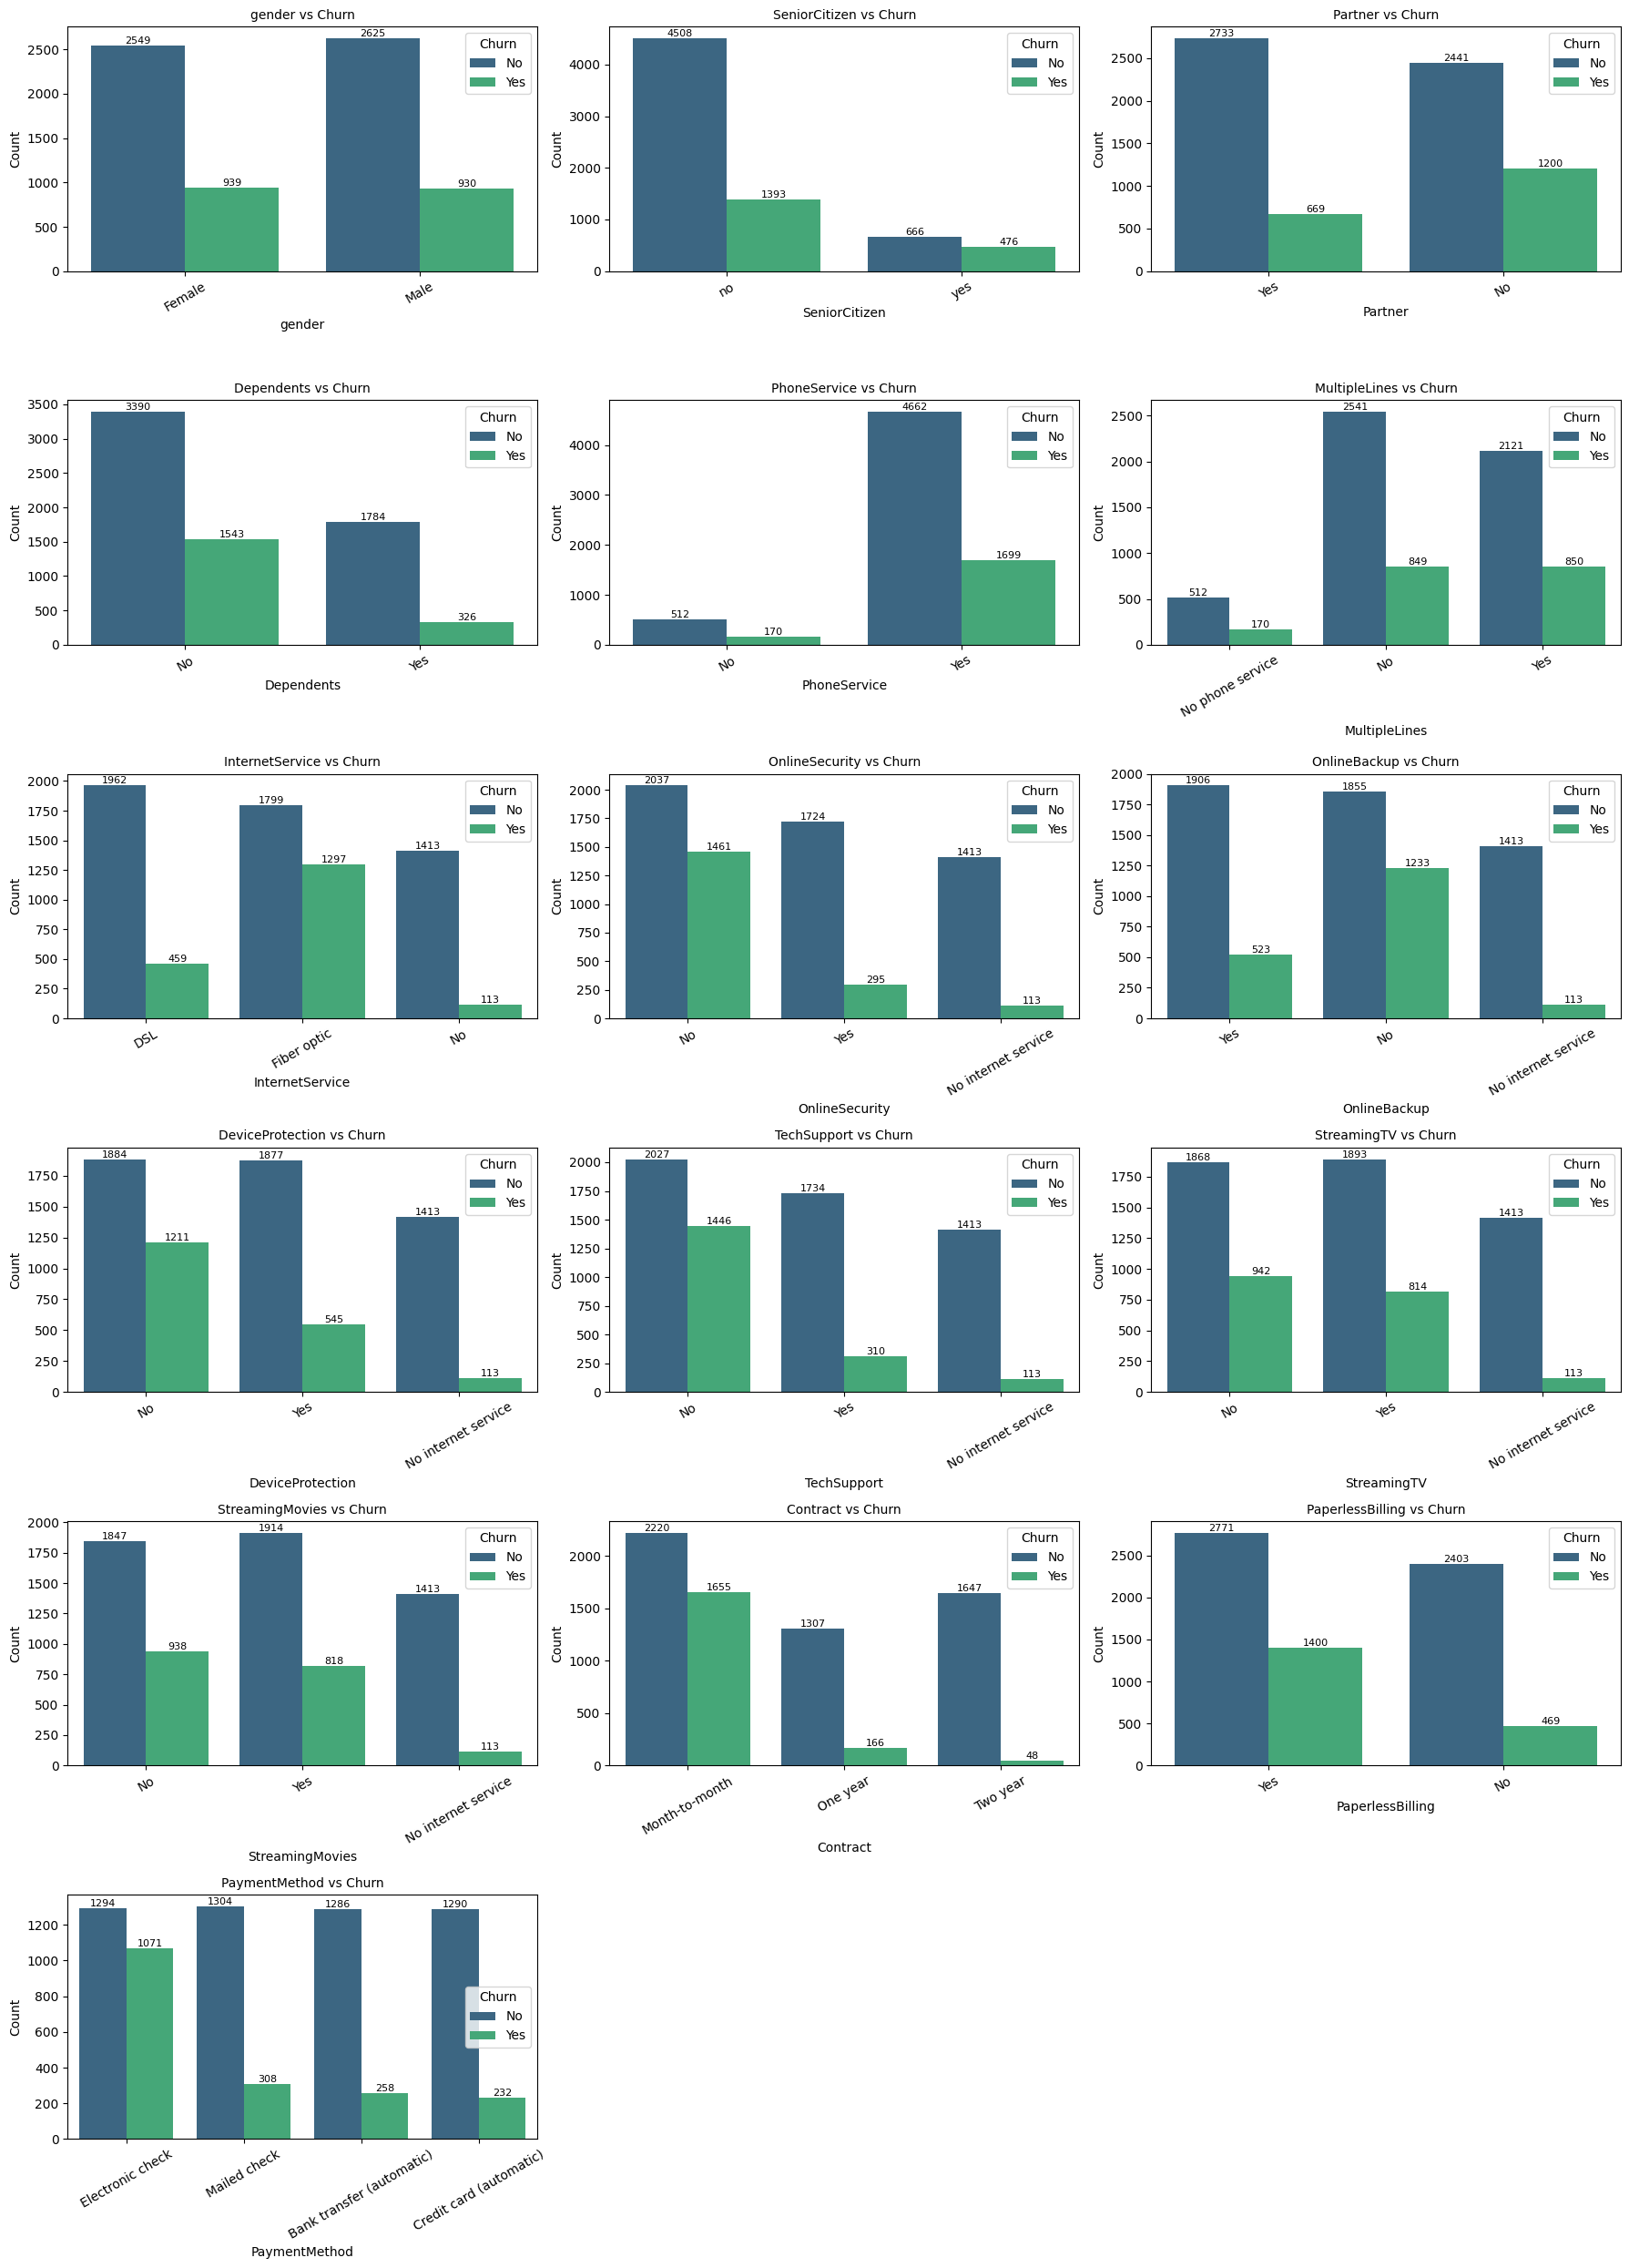

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to compare with 'Churn'
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Set the figure size
plt.figure(figsize=(18, 25))

# Loop through each column to create subplots
for i, col in enumerate(cat_cols, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    
    # Add title and labels
    plt.title(f'{col} vs Churn', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    
    # Add labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fontsize=8)
        
# Adjust layout for neat display
plt.tight_layout()
plt.show()


The visualizations reveal that customer churn is most strongly influenced by contract type and internet service. Customers on month-to-month contracts churn at an exceptionally high rate, while those on two-year contracts are the most loyal. Within internet services, Fiber optic customers are more likely to churn than DSL customers, and the absence of security and tech support add-ons (like OnlineSecurity and TechSupport) significantly increases the likelihood of a customer leaving. Furthermore, high churn is also associated with Senior Citizens, using PaperlessBilling, and paying by Electronic check, while having a Partner or Dependents appears to increase customer loyalty. 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


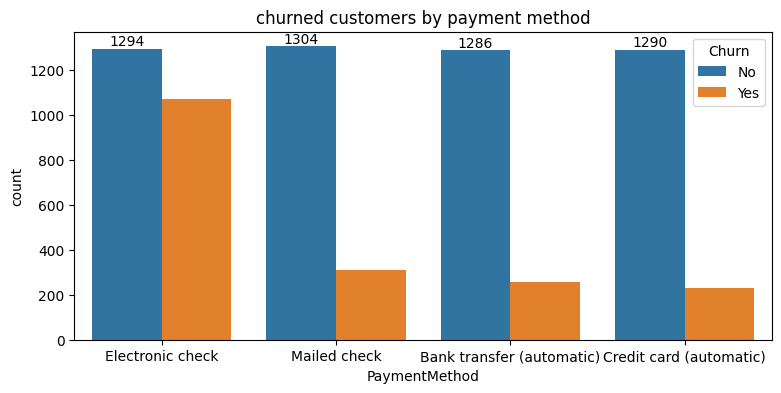

In [24]:
plt.figure(figsize =(9,4))
ax = sns.countplot(x = "PaymentMethod", data =df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("churned customers by payment method")
plt.show()